In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\bank-full.csv",delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.shape

(45211, 17)

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [13]:
df.duplicated().sum()

0

In [15]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [17]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


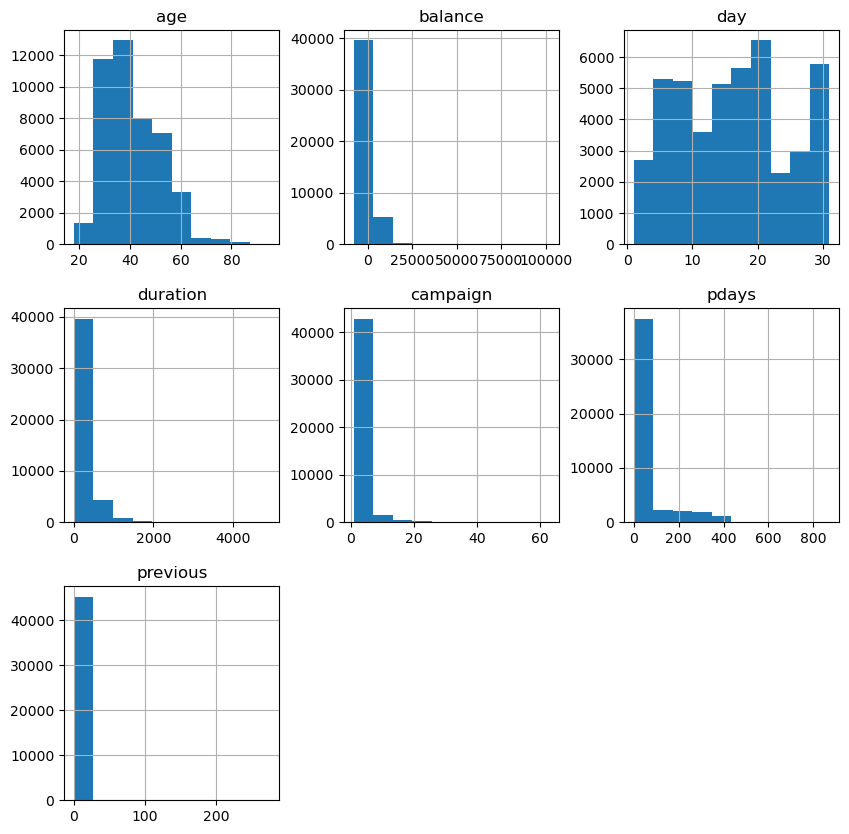

In [25]:
df.hist(figsize=(10,10))
plt.show()

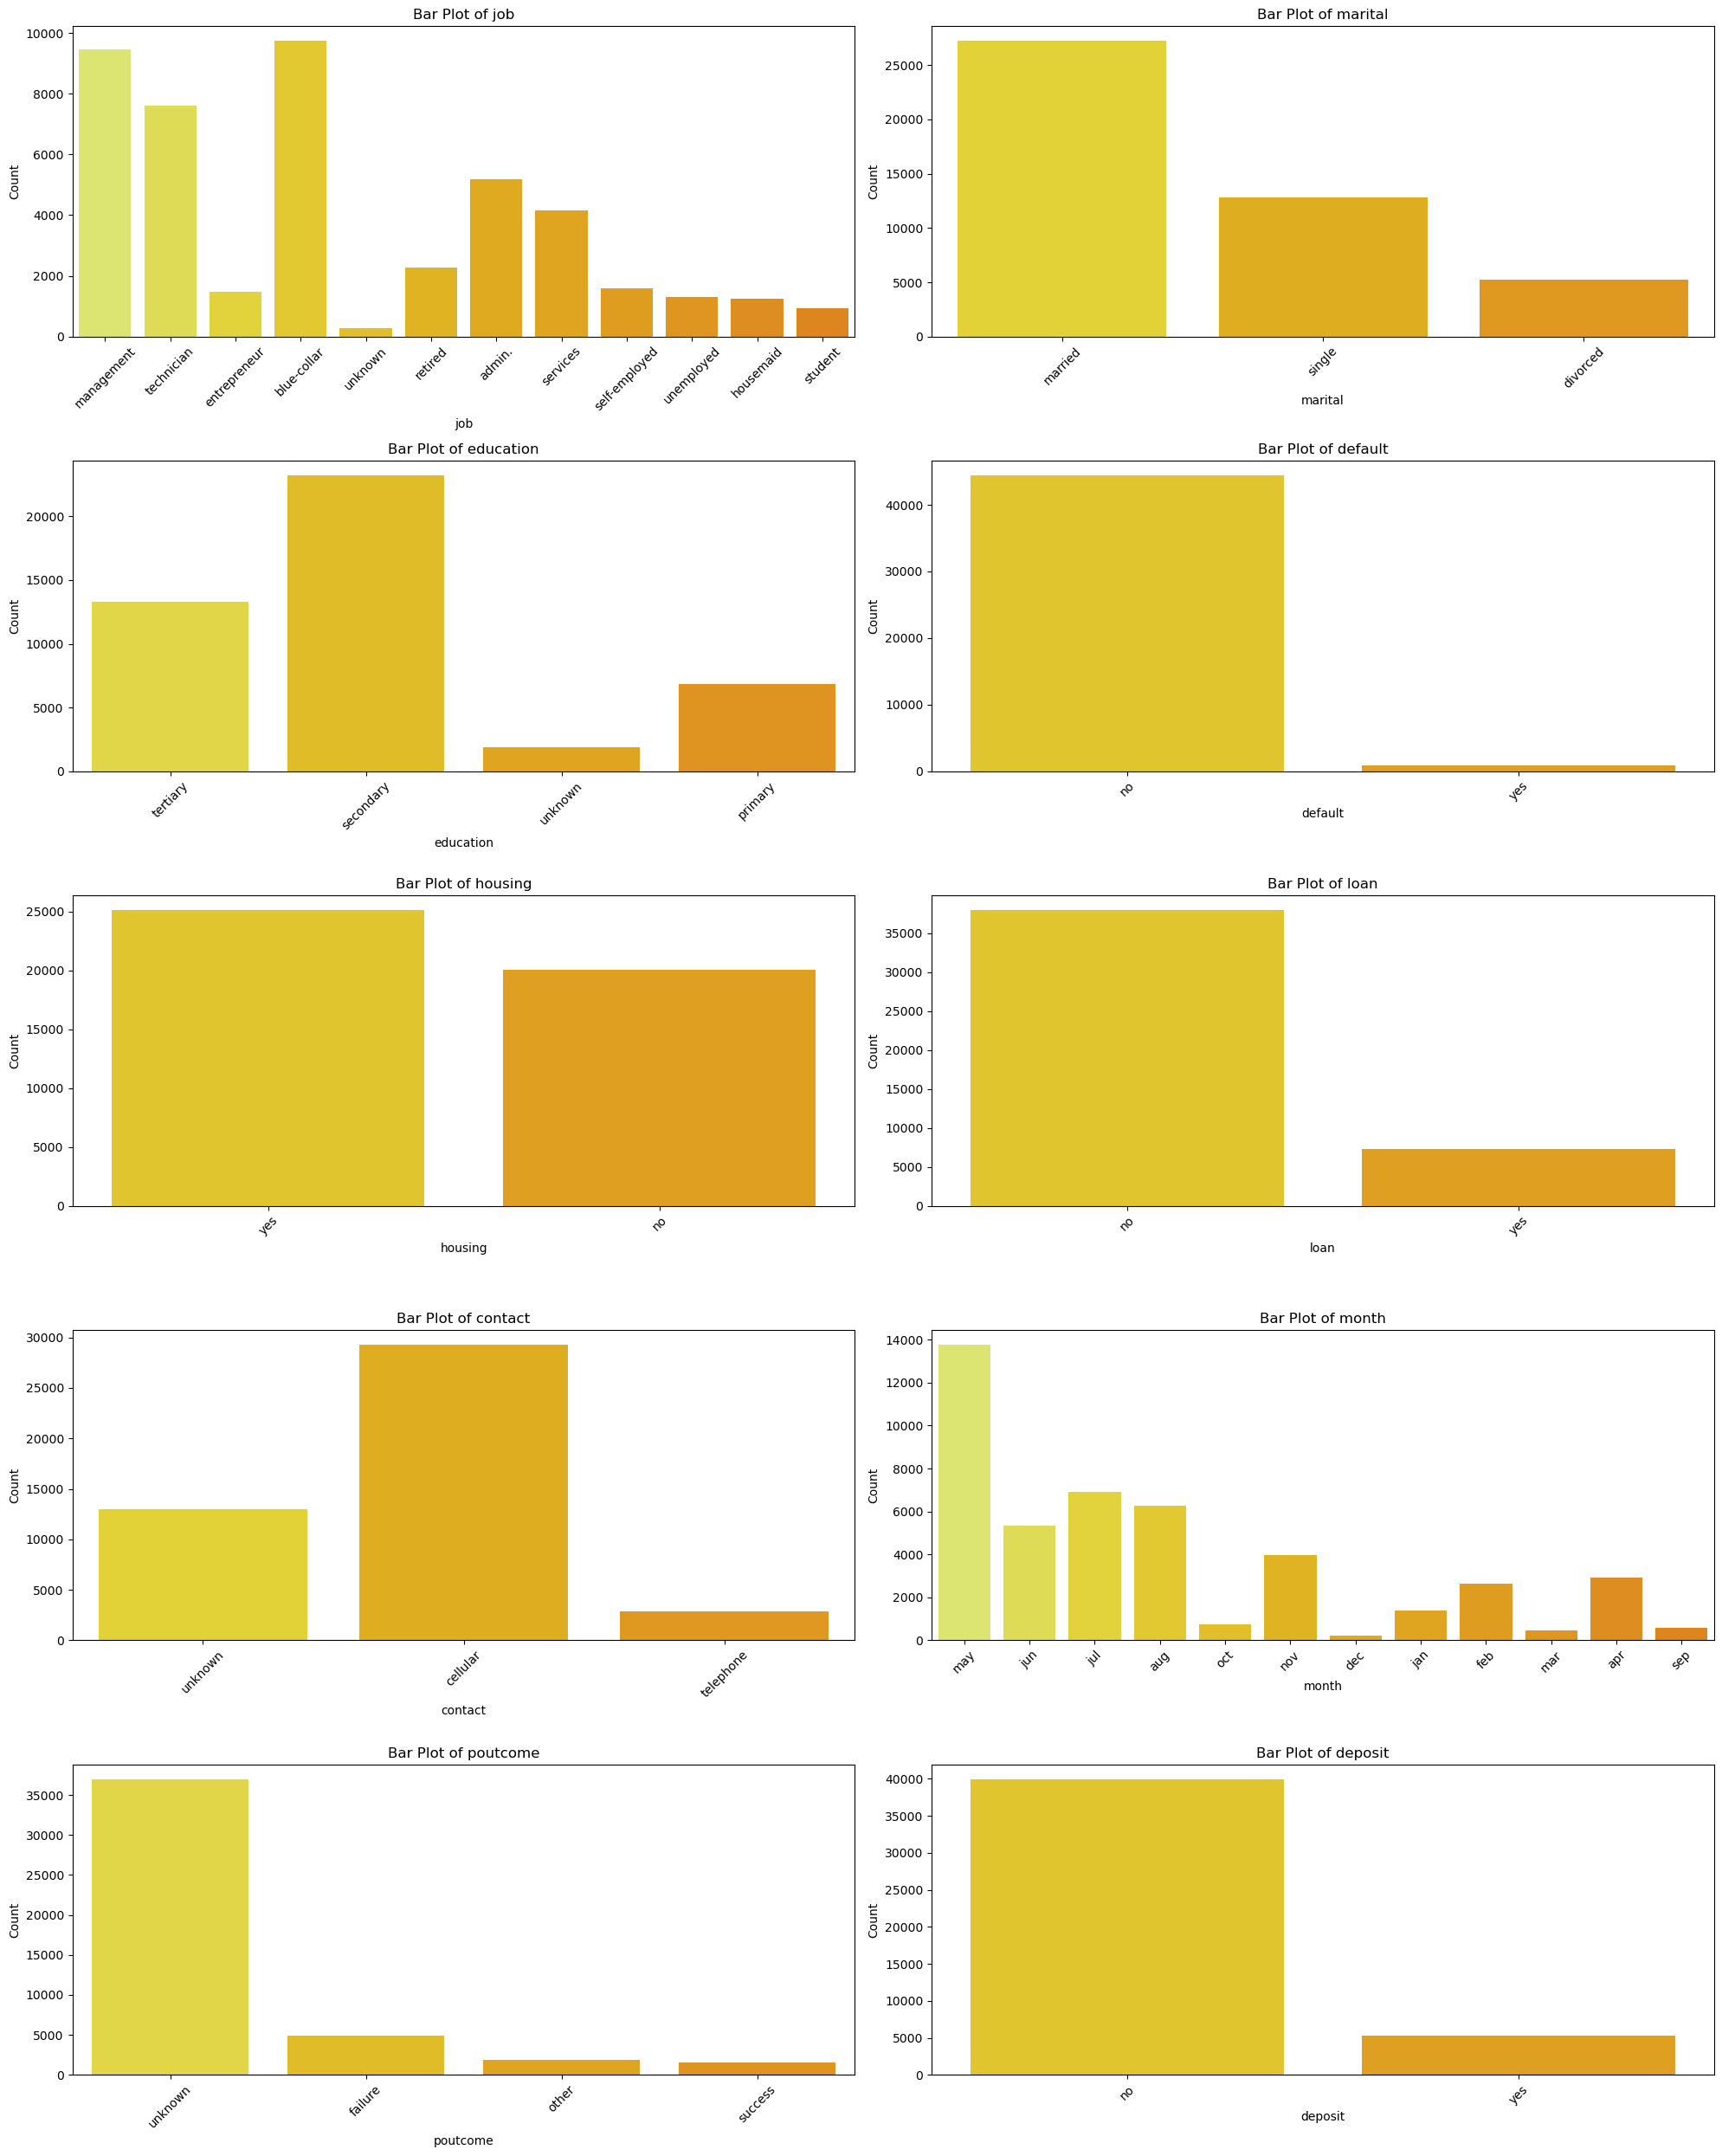

In [27]:
# Calculate the number of rows and columns for subplots
num_plots = len(cat_cols)
num_rows = (num_plots + 1) // 2  # Add 1 and divide by 2 to round up for odd numbers
num_cols = 2

# Create a new figure
plt.figure(figsize=(20, 25))  # Adjust the figure size as needed

# Loop through each feature and create a countplot
for i, feature in enumerate(cat_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=feature, data=df, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

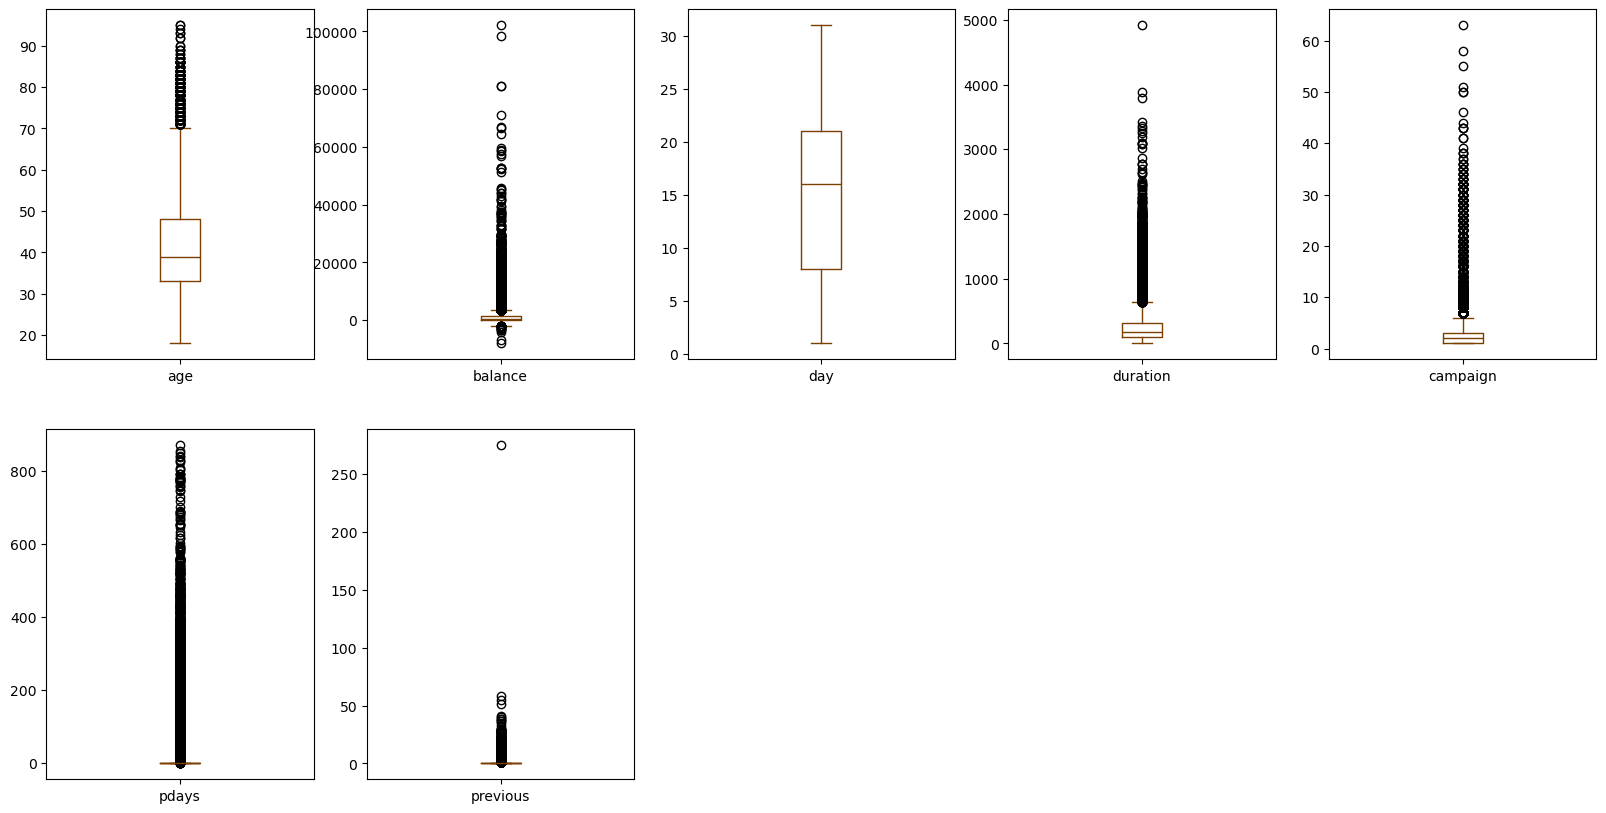

In [29]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [31]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

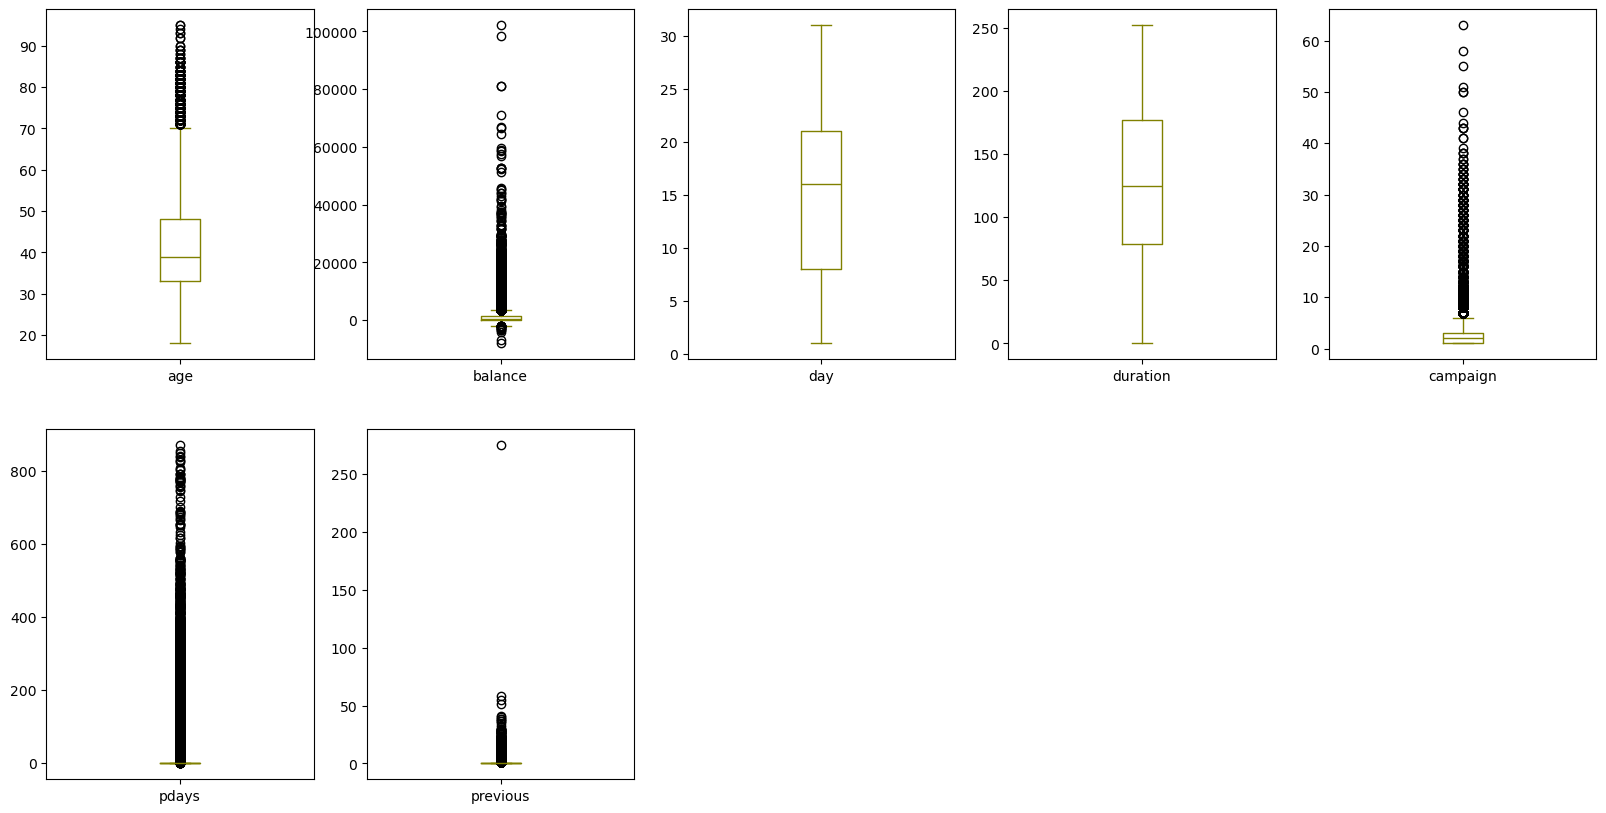

In [33]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.007718  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.007930 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.073588  0.162490 -0.093044 -0.051710
duration -0.007718  0.007930 -0.073588  1.000000 -0.215021  0.017803  0.003690
campaign  0.004760 -0.014578  0.162490 -0.215021  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044  0.017803 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.003690 -0.032855  0.454820  1.000000


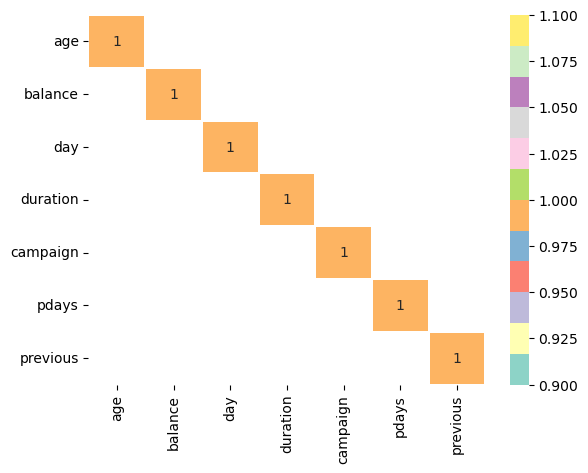

In [35]:
# Exclude non-numeric columns
numeric_df = df.drop(columns=cat_cols)

# Compute the correlation matrix
corr = numeric_df.corr()

# Print the correlation matrix
print(corr)

# Filter correlations with absolute value >= 0.90
corr = corr[abs(corr) >= 0.90]

sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [37]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [43]:
df1.shape

(45211, 17)

In [45]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,40,4,1,2,0,3036,1,0,2,4,8,253,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,253,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,253,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,253,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,253,3,0,0,3,0


In [47]:
df_encoded['deposit'].value_counts()

deposit
0    39922
1     5289
Name: count, dtype: int64

In [49]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(45211, 16)
(45211,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 16)
(11303, 16)
(33908,)
(11303,)


In [55]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [59]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [61]:
mscore(dt)


Training Score 0.8914120561519405
Testing Score 0.8882597540475979


In [63]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [65]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.8882597540475979
Confusion Matrix
 [[9860  138]
 [1125  180]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      9998
           1       0.57      0.14      0.22      1305

    accuracy                           0.89     11303
   macro avg       0.73      0.56      0.58     11303
weighted avg       0.86      0.89      0.86     11303



In [69]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


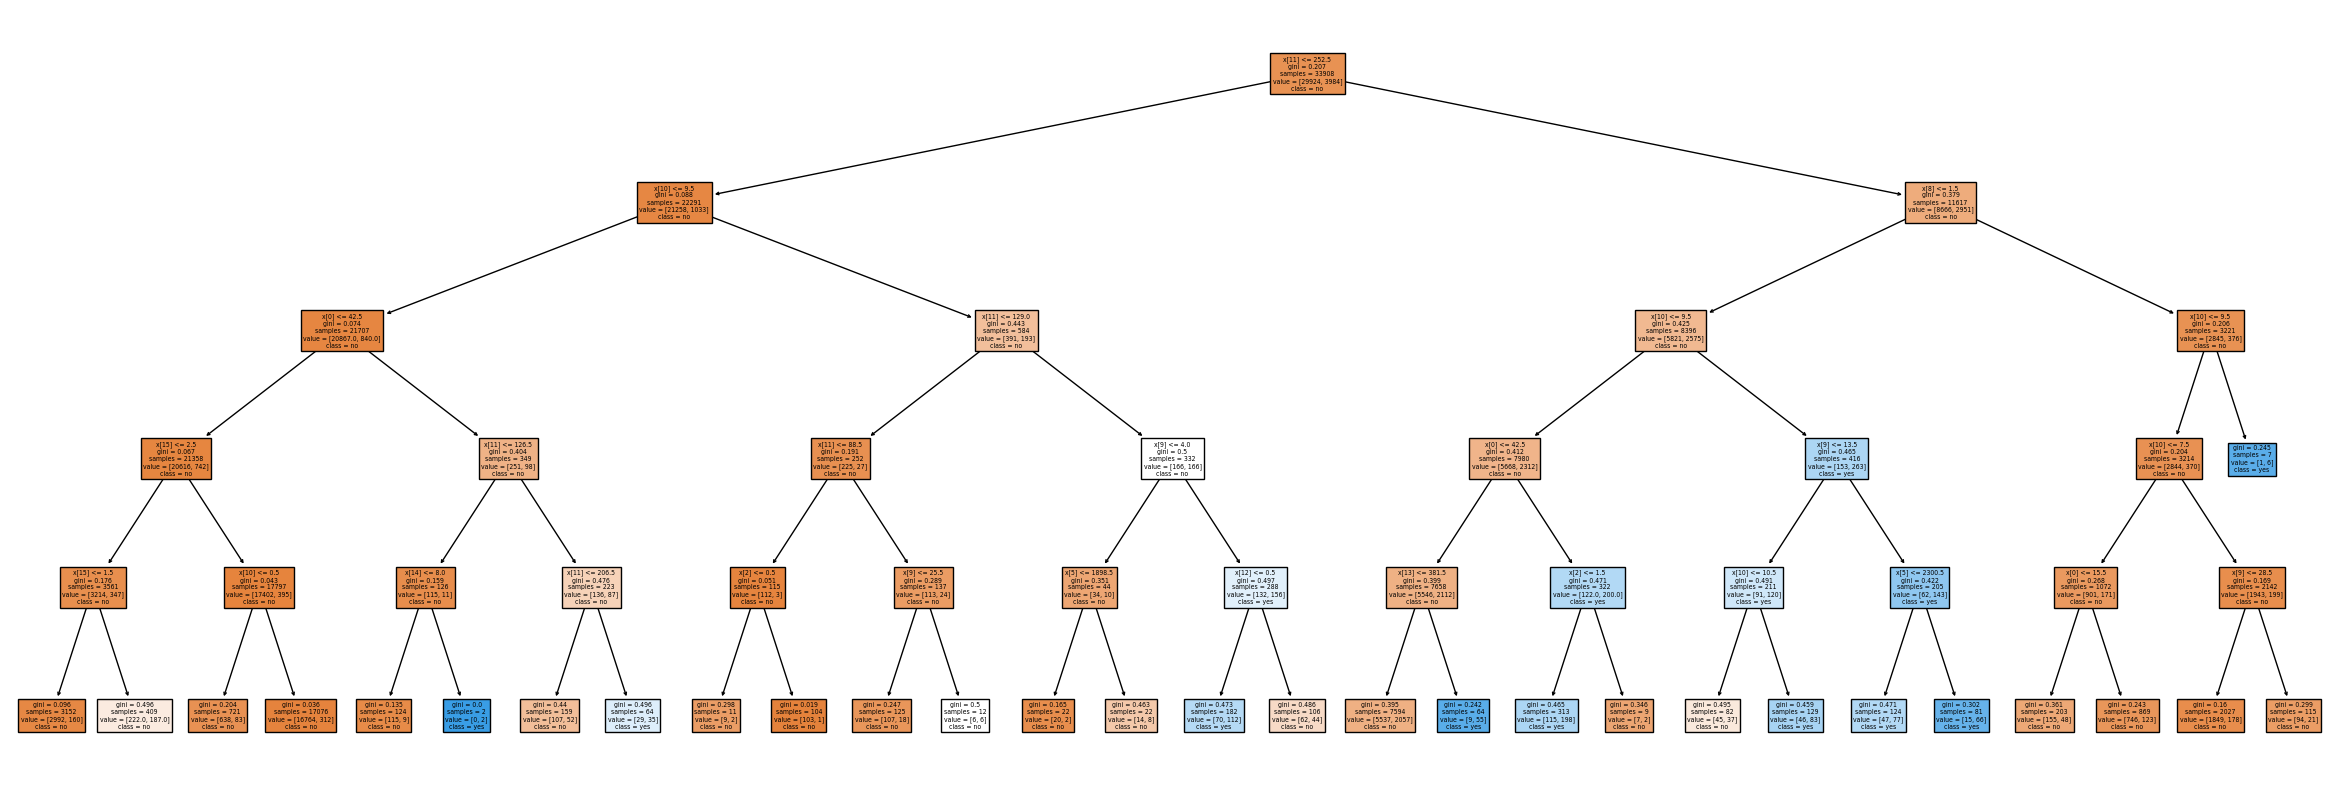

In [71]:
plt.figure(figsize=(30,10))
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [73]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [75]:
mscore(dt1)

Training Score 0.8882859502182375
Testing Score 0.8885251703087675


In [77]:
ypred_dt1 = dt1.predict(x_test)
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.8885251703087675
Confusion Matrix
 [[9906   92]
 [1168  137]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      9998
           1       0.60      0.10      0.18      1305

    accuracy                           0.89     11303
   macro avg       0.75      0.55      0.56     11303
weighted avg       0.86      0.89      0.85     11303



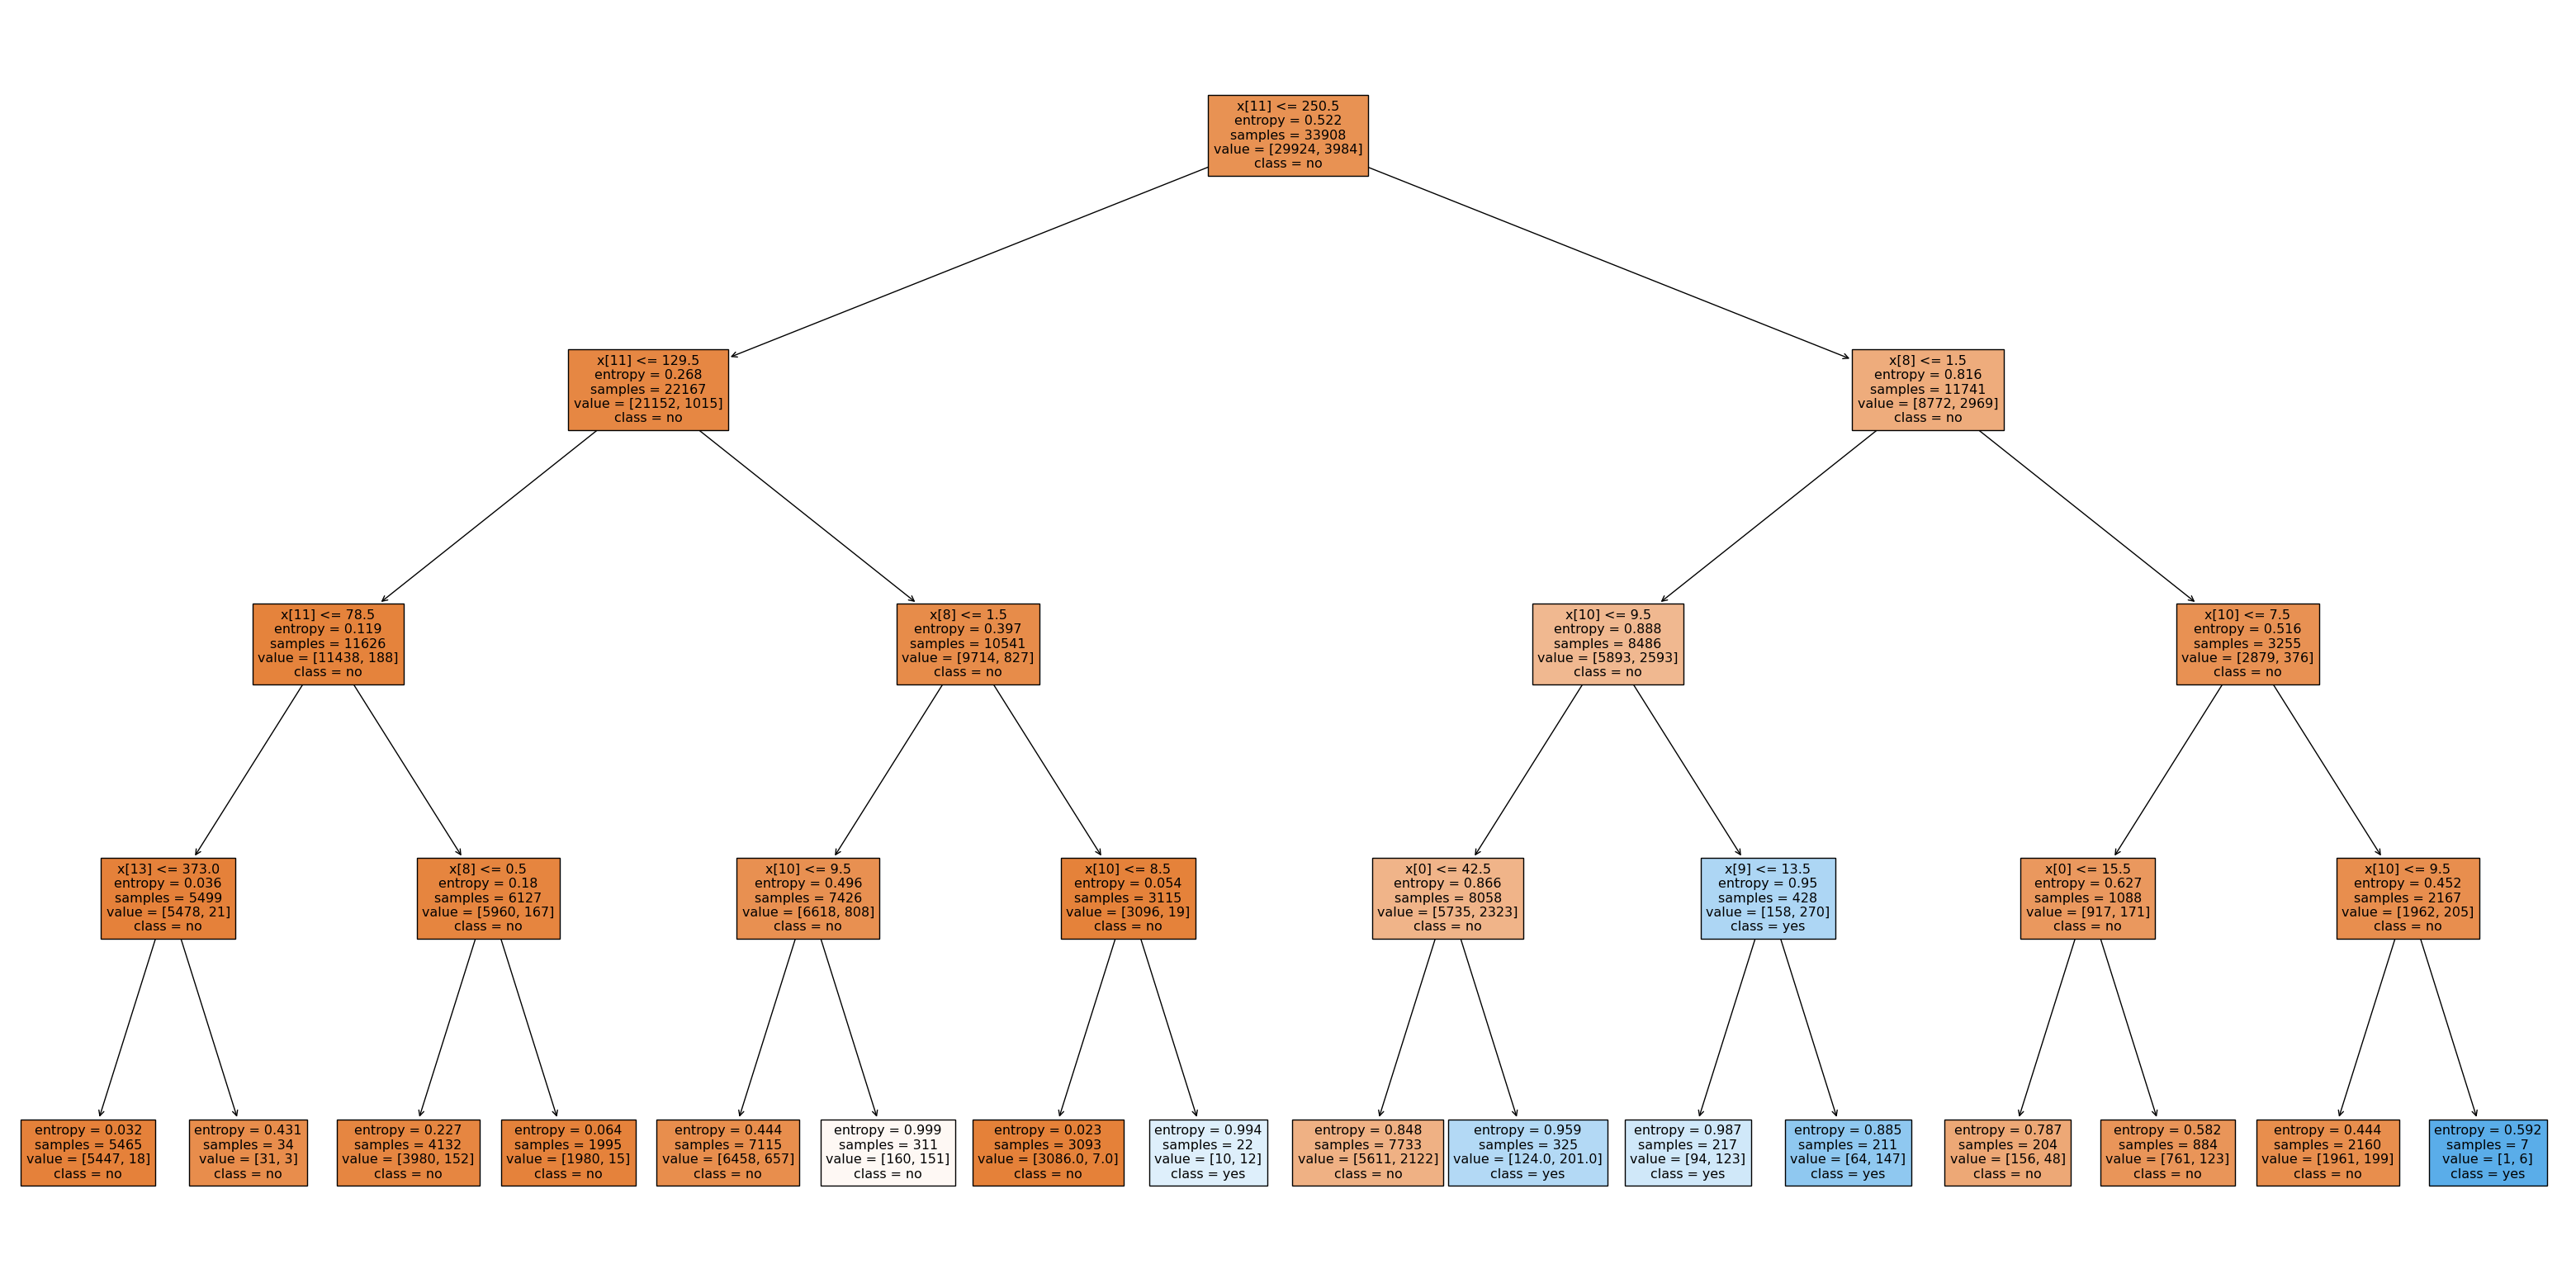

In [79]:
plt.figure(figsize=(40,20))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()